# 2023: Week 8 - Taking Stock
February 22, 2023
 Created by: Carl Allchin

For the final week of Intermediate Month, our data set needs so cleaning and grouping to allow us to analyse the top trades from The Data Source Bank's trading floor. 

No Wolf on Wall Street moments have happened but we've had some big trades happen across a wide range of companies so we need to understand these more. Can you help us find the top 5 trades for a series of different ways we look at the companies traded and the prices of the trades?

Input
- There are 12 files to input this week. Each number in the file name reflects the month it came from (January's file doesn't have a value)

The data can be found here
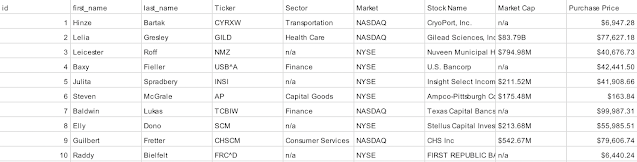

Requirements
- Input each of the 12 monthly files
- Create a 'file date' using the month found in the file name
- The Null value should be replaced as 1
- Clean the Market Cap value to ensure it is the true value as 'Market Capitalisation'
- Remove any rows with 'n/a'
- Categorise the Purchase Price into groupings
0 to 24,999.99 as 'Low'
25,000 to 49,999.99 as 'Medium'
50,000 to 74,999.99 as 'High'
75,000 to 100,000 as 'Very High'
- Categorise the Market Cap into groupings
Below $100M as 'Small'
Between $100M and below $1B as 'Medium'
Between $1B and below $100B as 'Large' 
$100B and above as 'Huge'
- Rank the highest 5 purchases per combination of: file date, Purchase Price Categorisation and Market Capitalisation Categorisation.
-Output only records with a rank of 1 to 5

Output
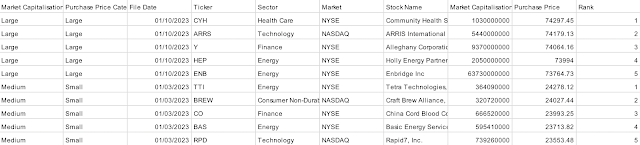

One file:

10 data fields:
- Market Capitalisation Categorisation
- Purchase Price Categorisation
- File Date
- Ticker
- Sector
- Market-
- Stock Name
- Market Capitalisation
- Purchase Price
- Rank
831 rows (832 rows incl. headers)

### 1.  Read in Files

In [336]:
import pandas as pd

In [337]:
# Read in each of the 12 csv files and append them
file_dates = ['MOCK_DATA-1.csv', 'MOCK_DATA-2.csv','MOCK_DATA-3.csv','MOCK_DATA-4.csv','MOCK_DATA-5.csv','MOCK_DATA-6.csv','MOCK_DATA-7.csv','MOCK_DATA-8.csv','MOCK_DATA-9.csv','MOCK_DATA-10.csv','MOCK_DATA-11.csv','MOCK_DATA-12.csv',]

1. Concat all files

In [338]:
# Read in file
# Insert a new column with the filename
# Concat all the files
data_all = pd.concat((pd.read_csv(i).assign(Date=i.split("-")[1]) for i in file_dates)).reset_index(drop = True)

In [339]:
# Rename Inserted column
data_all['File Date'] = data_all['Date']

In [340]:
# Clean up column values
data_all['File Date'] = [i.split('.csv')[0] for i in data_all['File Date']]

In [341]:
# Convert File Date to Date
data_all['File Date'] = pd.to_datetime(dict(day=1,  month=data_all['File Date'],year=2023 ))

In [342]:
# Drop "Date" column
data_all.drop("Date", axis=1, inplace=True)

In [343]:
# Print first 5 rows
data_all.head()

,id,first_name,last_name,Ticker,Sector,Market,Stock Name,Market Cap,Purchase Price,File Date
0,1,Hinze,Bartak,CYRXW,Transportation,NASDAQ,"CryoPort, Inc.",NaN,$6947.28,2023-01-01
1,2,Lelia,Gresley,GILD,Health Care,NASDAQ,"Gilead Sciences, Inc.",$83.79B,$77627.18,2023-01-01
2,3,Leicester,Roff,NMZ,NaN,NYSE,Nuveen Municipal High Income Opportunity Fund,$794.98M,$40676.73,2023-01-01
3,4,Baxy,Fieller,USB^A,Finance,NYSE,U.S. Bancorp,NaN,$42441.50,2023-01-01
4,5,Julita,Spradbery,INSI,NaN,NYSE,Insight Select Income Fund,$211.52M,$41908.66,2023-01-01


### 2. Clean the Market Cap value to ensure it is the true value as 'Market Capitalisation'
- Remove any rows that are NaN
- Remove $
- Convert to float and dollars
- Categorize

In [344]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              12000 non-null  int64         
 1   first_name      12000 non-null  object        
 2   last_name       12000 non-null  object        
 3   Ticker          12000 non-null  object        
 4   Sector          9378 non-null   object        
 5   Market          12000 non-null  object        
 6   Stock Name      12000 non-null  object        
 7   Market Cap      10109 non-null  object        
 8   Purchase Price  12000 non-null  object        
 9   File Date       12000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 937.6+ KB


In [345]:
# Drop rows with missing data in 'Market Cap'
data_all.dropna(subset=['Market Cap'],inplace=True)

In [346]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10109 entries, 1 to 11999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10109 non-null  int64         
 1   first_name      10109 non-null  object        
 2   last_name       10109 non-null  object        
 3   Ticker          10109 non-null  object        
 4   Sector          8599 non-null   object        
 5   Market          10109 non-null  object        
 6   Stock Name      10109 non-null  object        
 7   Market Cap      10109 non-null  object        
 8   Purchase Price  10109 non-null  object        
 9   File Date       10109 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 868.7+ KB


In [347]:
# Remove the $ from the 'Market Cap'
data_all['Market Cap'] = data_all['Market Cap'].str.replace("$", "", regex=True)

In [348]:
data_all.head()

,id,first_name,last_name,Ticker,Sector,Market,Stock Name,Market Cap,Purchase Price,File Date
1,2,Lelia,Gresley,GILD,Health Care,NASDAQ,"Gilead Sciences, Inc.",83.79B,$77627.18,2023-01-01
2,3,Leicester,Roff,NMZ,NaN,NYSE,Nuveen Municipal High Income Opportunity Fund,794.98M,$40676.73,2023-01-01
4,5,Julita,Spradbery,INSI,NaN,NYSE,Insight Select Income Fund,211.52M,$41908.66,2023-01-01
5,6,Steven,McGrale,AP,Capital Goods,NYSE,Ampco-Pittsburgh Corporation,175.48M,$163.84,2023-01-01
7,8,Elly,Dono,SCM,NaN,NYSE,Stellus Capital Investment Corporation,213.68M,$55985.51,2023-01-01


In [349]:
def convert_to_dollars(row):
    if row[-1] =="B":
        return float(row[:-1])*1000000000
    elif row[-1] =="M":
        return float(row[:-1])*1000000

In [350]:
data_all['Market Cap'] = data_all['Market Cap'].map(convert_to_dollars)

In [351]:
data_all.head()

,id,first_name,last_name,Ticker,Sector,Market,Stock Name,Market Cap,Purchase Price,File Date
1,2,Lelia,Gresley,GILD,Health Care,NASDAQ,"Gilead Sciences, Inc.",83790000000,$77627.18,2023-01-01
2,3,Leicester,Roff,NMZ,NaN,NYSE,Nuveen Municipal High Income Opportunity Fund,794980000,$40676.73,2023-01-01
4,5,Julita,Spradbery,INSI,NaN,NYSE,Insight Select Income Fund,211520000,$41908.66,2023-01-01
5,6,Steven,McGrale,AP,Capital Goods,NYSE,Ampco-Pittsburgh Corporation,175480000,$163.84,2023-01-01
7,8,Elly,Dono,SCM,NaN,NYSE,Stellus Capital Investment Corporation,213680000,$55985.51,2023-01-01


In [352]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10109 entries, 1 to 11999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10109 non-null  int64         
 1   first_name      10109 non-null  object        
 2   last_name       10109 non-null  object        
 3   Ticker          10109 non-null  object        
 4   Sector          8599 non-null   object        
 5   Market          10109 non-null  object        
 6   Stock Name      10109 non-null  object        
 7   Market Cap      10105 non-null  float64       
 8   Purchase Price  10109 non-null  object        
 9   File Date       10109 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 868.7+ KB


In [353]:
# To suppress presentation of numbers in scientific notation
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [354]:
#  Categorise the Market Cap into groupings
# Below $100M as 'Small'
# Between $100M and below $1B as 'Medium'
# Between $1B and below $100B as 'Large' 
# $100B and above as 'Huge'

def market_cap_cat(row):
    if 0<= row < 100000000:
        return 'Small'
    elif 100000000 <= row <1000000000:
        return 'Medium'
    elif 1000000000 <= row < 100000000000:
        return 'Large'
    else:
        return 'Huge'  

In [355]:
data_all['Market Cap Cat'] =data_all['Market Cap'].map(market_cap_cat) 

In [356]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10109 entries, 1 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10109 non-null  int64         
 1   first_name      10109 non-null  object        
 2   last_name       10109 non-null  object        
 3   Ticker          10109 non-null  object        
 4   Sector          8599 non-null   object        
 5   Market          10109 non-null  object        
 6   Stock Name      10109 non-null  object        
 7   Market Cap      10105 non-null  float64       
 8   Purchase Price  10109 non-null  object        
 9   File Date       10109 non-null  datetime64[ns]
 10  Market Cap Cat  10109 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 947.7+ KB


In [357]:
pd.isna(data_all['Market Cap']).sum()

4

Strange! WHy does Market Cap has 4 rows fewer now after applying the category transformation?

In [358]:
## remove undesired rows where Market Cap is missing
data_all.dropna(axis=0, subset=['Market Cap'], inplace =True)

In [359]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 1 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10105 non-null  int64         
 1   first_name      10105 non-null  object        
 2   last_name       10105 non-null  object        
 3   Ticker          10105 non-null  object        
 4   Sector          8598 non-null   object        
 5   Market          10105 non-null  object        
 6   Stock Name      10105 non-null  object        
 7   Market Cap      10105 non-null  float64       
 8   Purchase Price  10105 non-null  object        
 9   File Date       10105 non-null  datetime64[ns]
 10  Market Cap Cat  10105 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 947.3+ KB


### 3. Clean 'Purchase Price' column in a similar way to 'Market Capitalisation'
- Remove any rows that are NaN
- Remove $
- Convert to float /numeric value
- Categorize

In [360]:
# Drop rows with missing data in 'Market Cap'
data_all.dropna(subset=['Purchase Price'],inplace=True)

In [361]:
data_all.shape

(10105, 11)

In [362]:
# Remove the $ from the 'Purchase Price'
# Note: Will not work if missing values are present. How to skip the nan rows?
data_all['Purchase Price'] = data_all['Purchase Price'].str.replace("$", "", regex=True)

In [363]:
data_all['Purchase Price'].head()

1    77627.18
2    40676.73
4    41908.66
5      163.84
7    55985.51
Name: Purchase Price, dtype: object

In [364]:
# Convert 'Purchase Price' to float
data_all['Purchase Price']= pd.to_numeric(data_all['Purchase Price'])

In [365]:
#  Categorise the Purchase Price into groupings
# 0 to 24,999.99 as 'Low'
# 25,000 to 49,999.99 as 'Medium'
# 50,000 to 74,999.99 as 'High'
# 75,000 to 100,000 as 'Very High'

def price_cat(row):
    if 0 <= row <25000:
        return 'Low'
    elif 25000 <= row <50000:
        return 'Medium'
    elif 50000 <= row < 75000:
        return 'High'
    else:
        return 'Very High'  

In [366]:
data_all['Purchase Price Category'] = data_all['Purchase Price'].map(price_cat)

In [367]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 1 to 11999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       10105 non-null  int64         
 1   first_name               10105 non-null  object        
 2   last_name                10105 non-null  object        
 3   Ticker                   10105 non-null  object        
 4   Sector                   8598 non-null   object        
 5   Market                   10105 non-null  object        
 6   Stock Name               10105 non-null  object        
 7   Market Cap               10105 non-null  float64       
 8   Purchase Price           10105 non-null  float64       
 9   File Date                10105 non-null  datetime64[ns]
 10  Market Cap Cat           10105 non-null  object        
 11  Purchase Price Category  10105 non-null  object        
dtypes: datetime64[ns](1), float64(2)

In [368]:
data_all.head()

,id,first_name,last_name,Ticker,Sector,Market,Stock Name,Market Cap,Purchase Price,File Date,Market Cap Cat,Purchase Price Category
1,2,Lelia,Gresley,GILD,Health Care,NASDAQ,"Gilead Sciences, Inc.",83790000000,77627,2023-01-01,Large,Very High
2,3,Leicester,Roff,NMZ,NaN,NYSE,Nuveen Municipal High Income Opportunity Fund,794980000,40677,2023-01-01,Medium,Medium
4,5,Julita,Spradbery,INSI,NaN,NYSE,Insight Select Income Fund,211520000,41909,2023-01-01,Medium,Medium
5,6,Steven,McGrale,AP,Capital Goods,NYSE,Ampco-Pittsburgh Corporation,175480000,164,2023-01-01,Medium,Low
7,8,Elly,Dono,SCM,NaN,NYSE,Stellus Capital Investment Corporation,213680000,55986,2023-01-01,Medium,High


In [369]:
data_all.head()

,id,first_name,last_name,Ticker,Sector,Market,Stock Name,Market Cap,Purchase Price,File Date,Market Cap Cat,Purchase Price Category
1,2,Lelia,Gresley,GILD,Health Care,NASDAQ,"Gilead Sciences, Inc.",83790000000,77627,2023-01-01,Large,Very High
2,3,Leicester,Roff,NMZ,NaN,NYSE,Nuveen Municipal High Income Opportunity Fund,794980000,40677,2023-01-01,Medium,Medium
4,5,Julita,Spradbery,INSI,NaN,NYSE,Insight Select Income Fund,211520000,41909,2023-01-01,Medium,Medium
5,6,Steven,McGrale,AP,Capital Goods,NYSE,Ampco-Pittsburgh Corporation,175480000,164,2023-01-01,Medium,Low
7,8,Elly,Dono,SCM,NaN,NYSE,Stellus Capital Investment Corporation,213680000,55986,2023-01-01,Medium,High


In [370]:
# Drop unnecessary columns
data_all.drop(data_all.columns[0:3], axis=1, inplace=True)

In [371]:
data_all.columns

Index(['Ticker', 'Sector', 'Market', 'Stock Name', 'Market Cap',
       'Purchase Price', 'File Date', 'Market Cap Cat',
       'Purchase Price Category'],
      dtype='object')

### 4. Rank the highest 5 purchases 

- For each combination of: 
file date, Purchase Price Categorisation and Market Capitalisation Categorisation.
- Output only records with a rank of 1 to 5



In [372]:
data_all=data_all.sort_values(by=[ 'File Date', 'Purchase Price Category', 'Market Cap Cat'], ascending=[True, False, False])

In [373]:
data_all['Rank'] =1
data_all['Rank'] = data_all.groupby(['File Date', 'Purchase Price Category', 'Market Cap Cat'])['Rank'].cumsum()
data_all.head(10)

,Ticker,Sector,Market,Stock Name,Market Cap,Purchase Price,File Date,Market Cap Cat,Purchase Price Category,Rank
59,EARS,Health Care,NASDAQ,Auris Medical Holding AG,30590000,84857,2023-01-01,Small,Very High,1
60,VNCE,Consumer Services,NYSE,Vince Holding Corp.,22240000,75257,2023-01-01,Small,Very High,2
95,BLIN,Technology,NASDAQ,"Bridgeline Digital, Inc.",12160000,81186,2023-01-01,Small,Very High,3
101,IMI,Technology,NASDAQ,"Intermolecular, Inc.",47580000,90042,2023-01-01,Small,Very High,4
133,AGZD,NaN,NASDAQ,WisdomTree Barclays Interest Rate Hedged U.S. ...,23970000,76493,2023-01-01,Small,Very High,5
160,FLKS,Health Care,NASDAQ,"Flex Pharma, Inc.",64330000,96663,2023-01-01,Small,Very High,6
188,BUR,Consumer Non-Durables,NASDAQ,Burcon NutraScience Corp,41230000,82747,2023-01-01,Small,Very High,7
234,PSET,NaN,NASDAQ,Principal Price Setters Index ETF,7240000,84847,2023-01-01,Small,Very High,8
295,FH,Miscellaneous,NASDAQ,FORM Holdings Corp.,32870000,88339,2023-01-01,Small,Very High,9
309,JTPY,Finance,NASDAQ,JetPay Corporation,32740000,84409,2023-01-01,Small,Very High,10


In [374]:
filtered = data_all[data_all['Rank']<=5]

In [375]:
filtered

,Ticker,Sector,Market,Stock Name,Market Cap,Purchase Price,File Date,Market Cap Cat,Purchase Price Category,Rank
59,EARS,Health Care,NASDAQ,Auris Medical Holding AG,30590000,84857,2023-01-01,Small,Very High,1
60,VNCE,Consumer Services,NYSE,Vince Holding Corp.,22240000,75257,2023-01-01,Small,Very High,2
95,BLIN,Technology,NASDAQ,"Bridgeline Digital, Inc.",12160000,81186,2023-01-01,Small,Very High,3
101,IMI,Technology,NASDAQ,"Intermolecular, Inc.",47580000,90042,2023-01-01,Small,Very High,4
133,AGZD,NaN,NASDAQ,WisdomTree Barclays Interest Rate Hedged U.S. ...,23970000,76493,2023-01-01,Small,Very High,5
...,...,...,...,...,...,...,...,...,...,...
11009,ADC,Consumer Services,NYSE,Agree Realty Corporation,1260000000,55508,2023-12-01,Large,High,3
11034,UMC,Technology,NYSE,United Microelectronics Corporation,4950000000,59015,2023-12-01,Large,High,4
11050,MTOR,Capital Goods,NYSE,"Meritor, Inc.",1410000000,55604,2023-12-01,Large,High,5
11202,TSM,Technology,NYSE,Taiwan Semiconductor Manufacturing Company Ltd.,186020000000,69057,2023-12-01,Huge,High,1


Answer has only 831 rows. Let's see what's happening

In [376]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 59 to 11944
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Ticker                   831 non-null    object        
 1   Sector                   716 non-null    object        
 2   Market                   831 non-null    object        
 3   Stock Name               831 non-null    object        
 4   Market Cap               831 non-null    float64       
 5   Purchase Price           831 non-null    float64       
 6   File Date                831 non-null    datetime64[ns]
 7   Market Cap Cat           831 non-null    object        
 8   Purchase Price Category  831 non-null    object        
 9   Rank                     831 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 71.4+ KB


Market Cap has 831 non-null values whereas the Market Cap Cat has 835 values. Strange!

In [377]:
filtered[['Market Cap Cat', 'Market Cap']].sort_values(['Market Cap'])

,Market Cap Cat,Market Cap
2036,Small,1930000
9080,Small,1970000
7114,Small,2700000
6009,Small,3500000
11051,Small,3640000
...,...,...
9549,Huge,540440000000
7521,Huge,650090000000
6786,Huge,663120000000
6290,Huge,663120000000


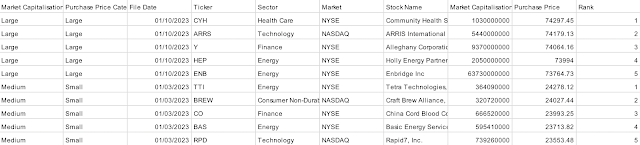